In [4]:
import torch.nn.functional as F
from forestFire import ForestFire
from torch import nn
import torch
import numpy as np
import random

## Setup replay memory object

In [2]:
class ReplayMemory:
    def __init__(self, size):
        self.buffer = []
        self.max_size = size
        self.oldest_transition = 0

    def sample(self, mb):
        return random.sample(self.buffer, mb)

    def new_transition(self, state, action, reward, next_state):
        data = [state, action, reward, next_state]
        # Check if buffer is full
        if len(self.buffer) == self.max_size:
            # Replace oldest value in the buffer
            self.buffer[self.oldest_transition] = data
            self.oldest_transition += 1
            if self.oldest_transition == self.max_size:
                self.oldest_transition = 0
        else:
            # Append to the end of buffer
            self.buffer.append(data)

# Create DQN

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class ForestFireDQN(nn.Module):
    def __init__(self):
        super(ForestFireDQN, self).__init__()
        self.input_layer = nn.Linear(in_features=8, out_features=32)
        self.hidden = nn.Linear(in_features=32, out_features=64)
        self.output_layer = nn.Linear(in_features=64, out_features=4)

    def forward(self, x):
        x.to(device)
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden(x))
        x = self.output_layer(x)
        return x

In [ ]:
max_episodes = 1000
memory = ReplayMemory(size=10000)
minibatch_size = 128
gamma = 0.99
C = 5


# Environment

In [6]:
import forestFire

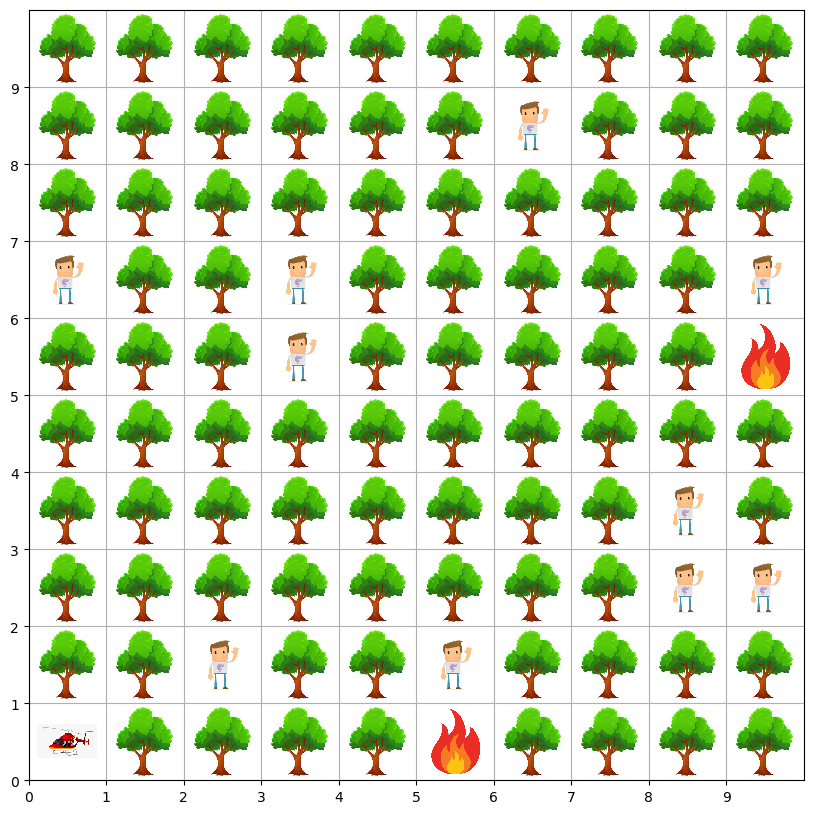

NameError: name 'env' is not defined

In [7]:
env = forestFire.ForestFire(10, 10)
env.reset()
env.render()
done = False
while not done:
    obs, rew, done = env.step(2)
    env.render()